In [2]:
import pandas as pd
import numpy as np
from glob import glob
from data_mani.visu import *
from prediction.functions import *

In [3]:
PREDICTION_MODEL = ['lasso', 'ridge', 'enet', 'random_forest', 'lgb', 'nn3']
FS_METHODS = ['all', 'granger', 'huang', 'IAMB', 'mda', 'mdi', 'MMMB', 'sfi']
EVALUATION_START = '2012-07-03'
TICKER_NAMES = ['SPX Index', 'CCMP Index', 'RTY Index']
TITLE = 'OOS Cummulative Returns for each Feature Selection Method given a Prediction Model'
BENCHMARK_NAME = 'return'

# Aggregate prediction results

In [4]:
melt_predictions_df, melt_benchmark_df, melt_r2_df = aggregate_prediction_results(prediction_models=PREDICTION_MODEL,
                                                                                  fs_models=FS_METHODS,
                                                                                  evaluation_start_date=EVALUATION_START,
                                                                                  ticker_names=TICKER_NAMES,
                                                                                  benchmark_name=BENCHMARK_NAME)

/home/felsal/Desktop/finance_paper/causal_feature/src/prediction/functions.py:69: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark_df['model'] = benchmark_df['ticker']
/home/felsal/Desktop/finance_paper/causal_feature/src/prediction/functions.py:70: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  benchmark_df['fs'] = 'raw'


In [5]:
pred_ret_df, pred_pos_df = gen_strat_positions_and_ret_from_pred(predictions_df=melt_predictions_df,
                                                                 target_asset_returns=melt_benchmark_df)

## R2 -  Gu, Kelly, and Xiu (2020)

In [6]:
r2_tb, agg_fs_r2_tb, agg_fore_r2_tb = plot_df_to_table(df=melt_r2_df,
                                                       index=['ticker', 'fs'],
                                                       columns=['model'],
                                                       values=['r2'],
                                                       apply_factor_to_table=100)

In [7]:
r2_tb

model               enet  lasso   lgb     nn3  random_forest   ridge
ticker     fs                                                       
CCMP Index IAMB     0.14   0.22  0.28   -1.45           0.02   -1.85
           MMMB     0.22   0.20  0.32   -0.56          -0.19   -1.08
           all      0.36   0.36  0.37    0.03           0.33 -110.98
           granger  0.35   0.36  0.32    0.31          -0.60   -3.70
           huang    0.16   0.33  0.32    0.25           0.04   -1.19
           mda      0.36   0.36  0.13   -0.67           0.03  -26.30
           mdi      0.36   0.36  0.31    0.36           0.19  -45.45
           sfi      0.35   0.36  0.45   -0.28           0.06  -83.41
RTY Index  IAMB    -0.03   0.14  0.28   -0.34           0.51   -0.78
           MMMB     0.00  -0.03  0.51   -0.23          -0.06   -0.70
           all      0.15   0.15  0.11   -0.26           0.25 -135.35
           granger -0.07   0.09  0.14   -0.42           0.01   -1.78
           huang    0.12   0.09  0.13    0.09           0.06   -0.18
           mda      0.15   0.15  0.09   -0.27           0.35 -110.07
           mdi      0.15   0.15 -0.04    0.03           0.42  -71.48
           sfi      0.15   0.15 -0.15 -203.73           0.06 -104.13
SPX Index  IAMB    -0.13   0.19  0.09   -9.68          -2.02   -3.07
           MMMB     0.15   0.26  0.25   -0.25          -2.05   -2.35
           all      0.26   0.26 -0.02   -0.32           0.62 -122.60
           granger  0.26   0.26  0.23    0.05           0.49   -4.52
           huang    0.22   0.16  0.15   -0.12           0.24    0.13
           mda      0.26   0.26  0.32    0.31          -0.00  -40.51
           mdi      0.26   0.26  0.26    0.30          -0.10  -51.36
           sfi      0.26   0.26  0.29    0.09          -0.04  -95.67

In [8]:
agg_fs_r2_tb

sum  median  median_std_adj
ticker     fs                                     
CCMP Index IAMB      -2.64    0.08            0.08
           MMMB      -1.09    0.01            0.01
           all     -109.54    0.34            0.01
           granger   -2.97    0.31            0.19
           huang     -0.11    0.20            0.34
           mda      -26.09    0.08            0.01
           mdi      -43.87    0.34            0.02
           sfi      -82.47    0.20            0.01
RTY Index  IAMB      -0.22    0.05            0.12
           MMMB      -0.52   -0.05           -0.12
           all     -134.96    0.13            0.00
           granger   -2.03   -0.03           -0.04
           huang      0.31    0.09            0.79
           mda     -109.60    0.12            0.00
           mdi      -70.76    0.09            0.00
           sfi     -307.64   -0.04           -0.00
SPX Index  IAMB     -14.61   -1.07           -0.28
           MMMB      -4.01   -0.05           -0.04
           all     -121.81    0.12            0.00
           granger   -3.23    0.24            0.12
           huang      0.77    0.15            1.19
           mda      -39.36    0.26            0.02
           mdi      -50.38    0.26            0.01
           sfi      -94.81    0.18            0.00

In [9]:
agg_fore_r2_tb

sum  median  median_std_adj
model                                         
enet              4.46    0.19            1.38
lasso             5.36    0.24            2.34
lgb               5.13    0.26            1.64
nn3            -216.78   -0.24           -0.01
random_forest    -1.40    0.05            0.07
ridge         -1018.39  -15.41           -0.32

# Cummulative returns

## Grouped by FS method

/home/felsal/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


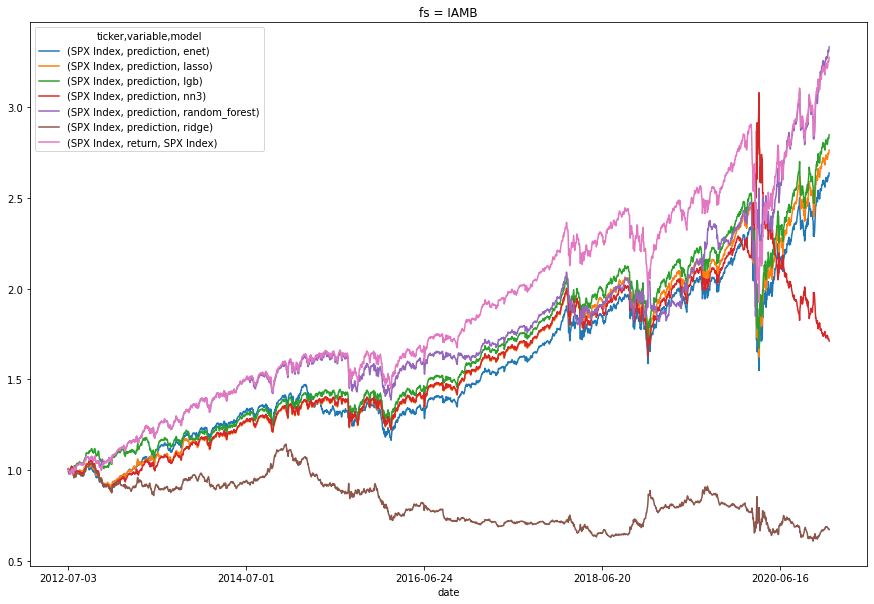

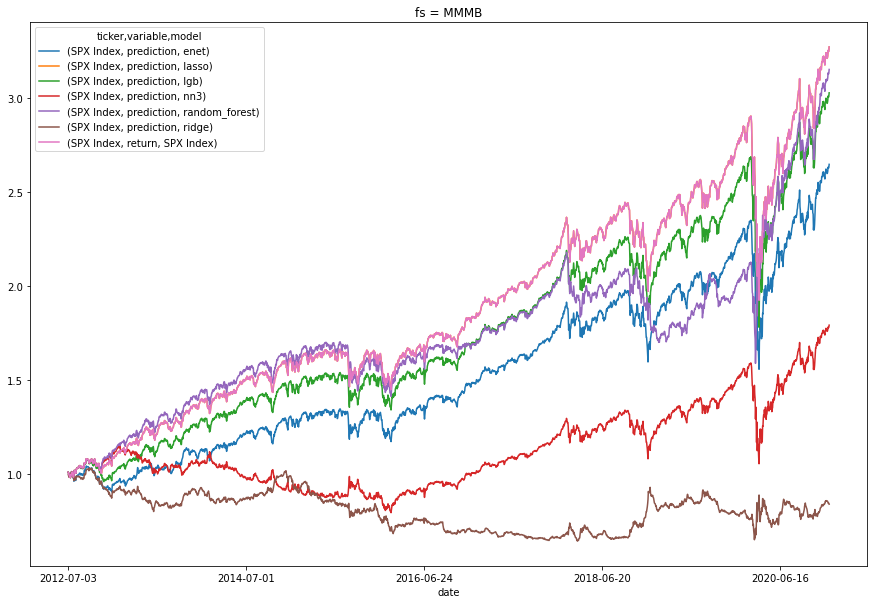

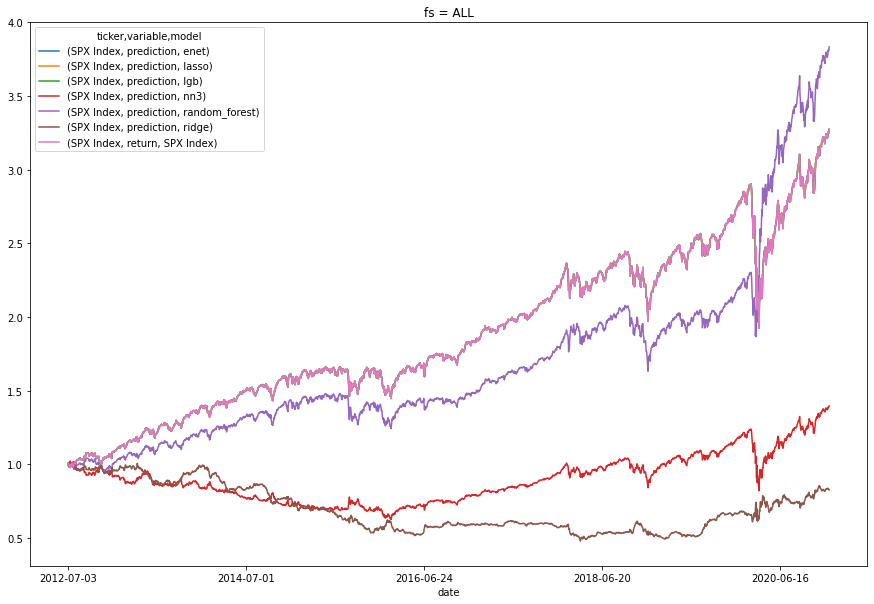

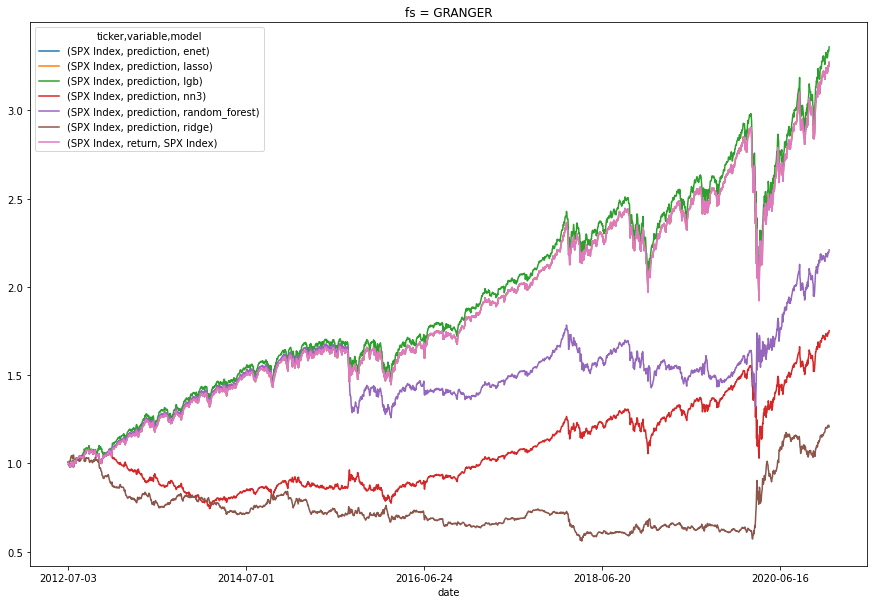

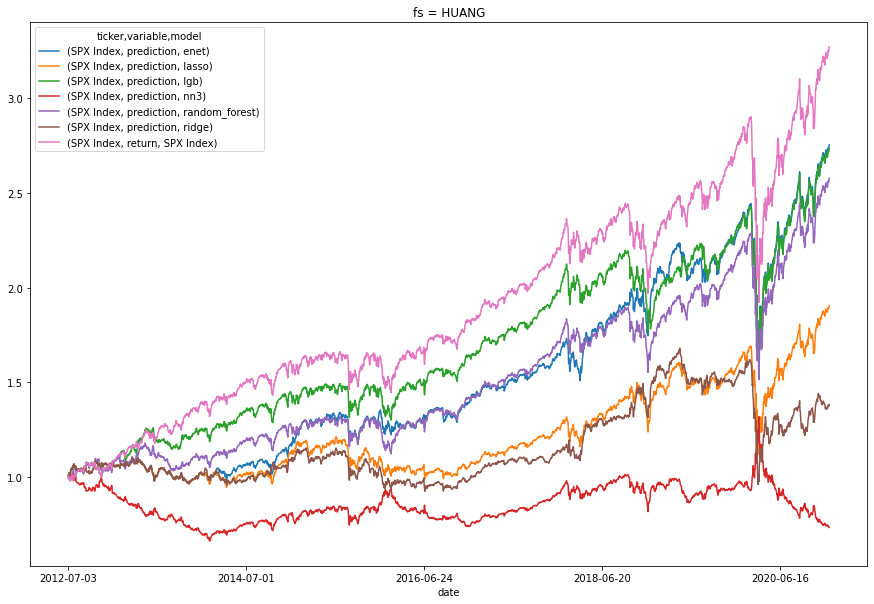

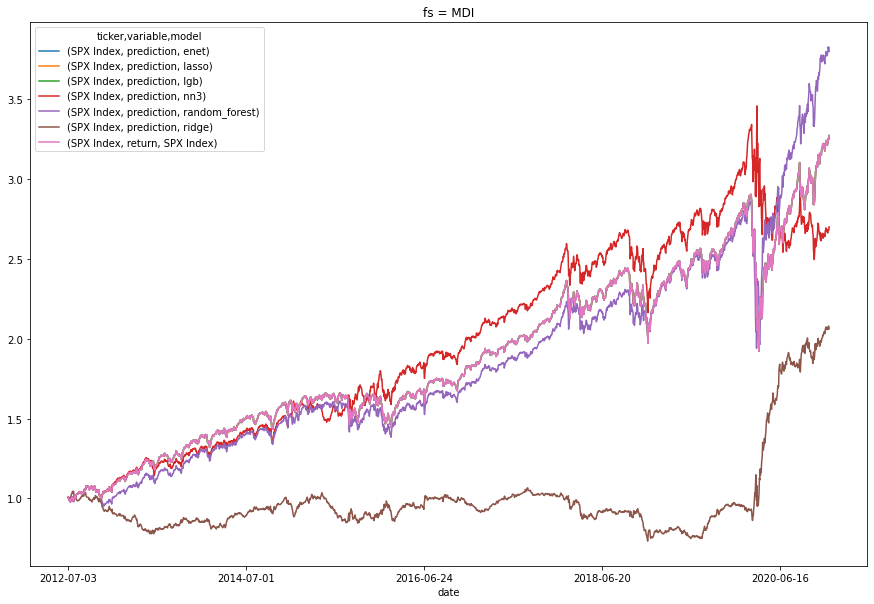

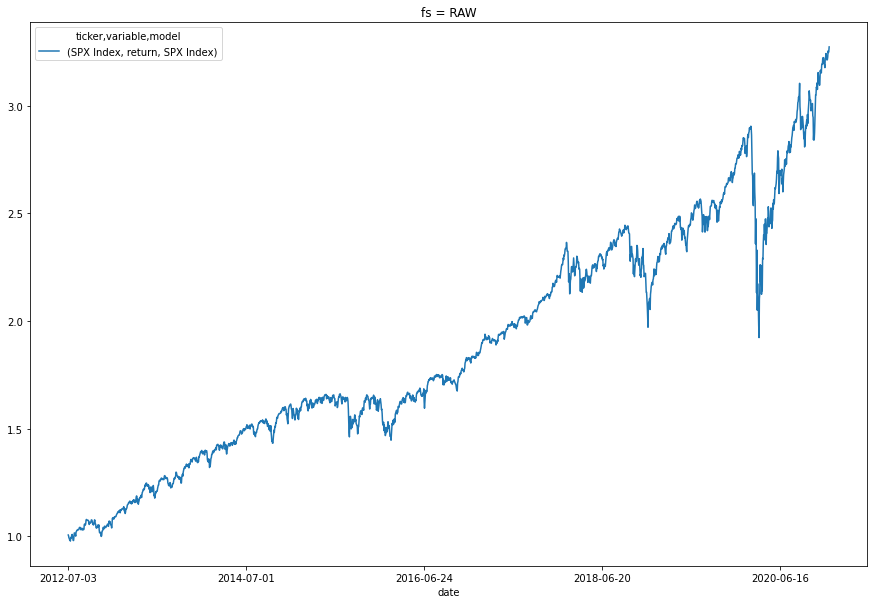

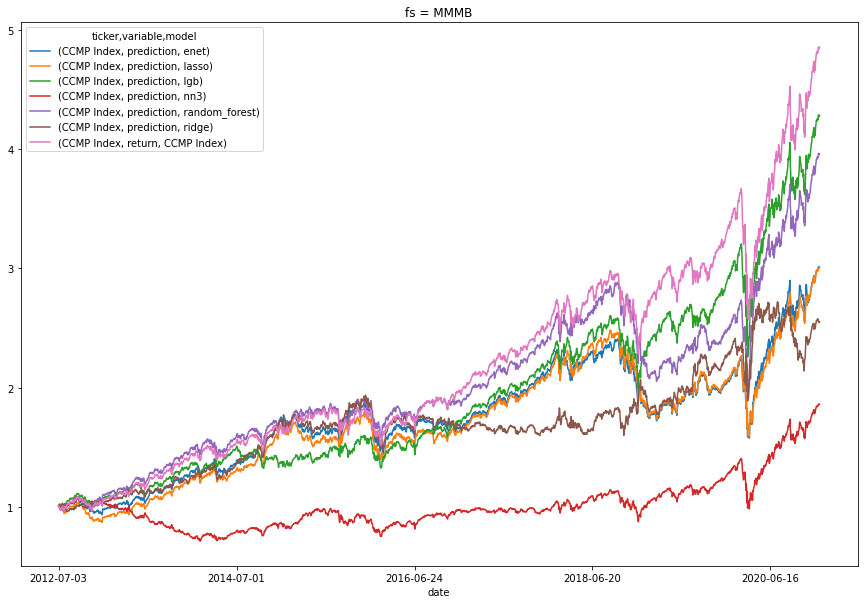

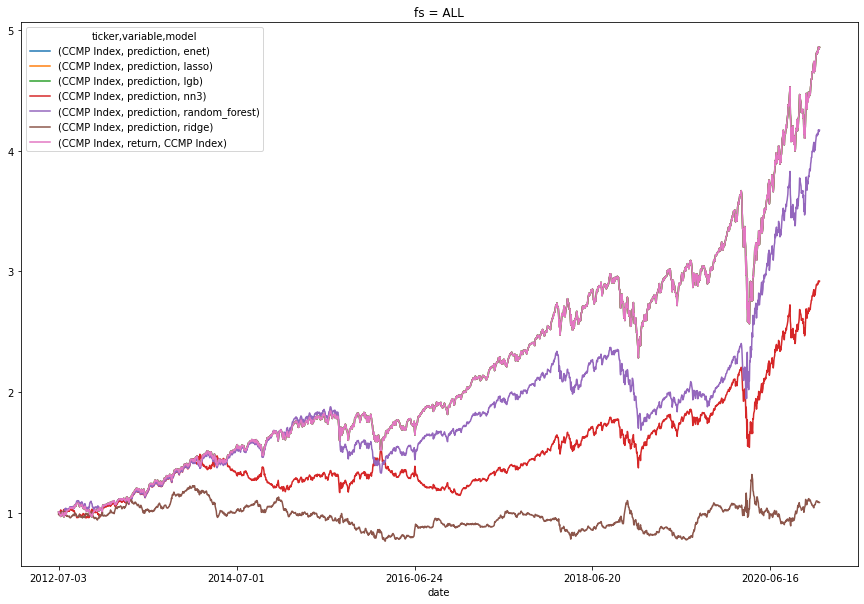

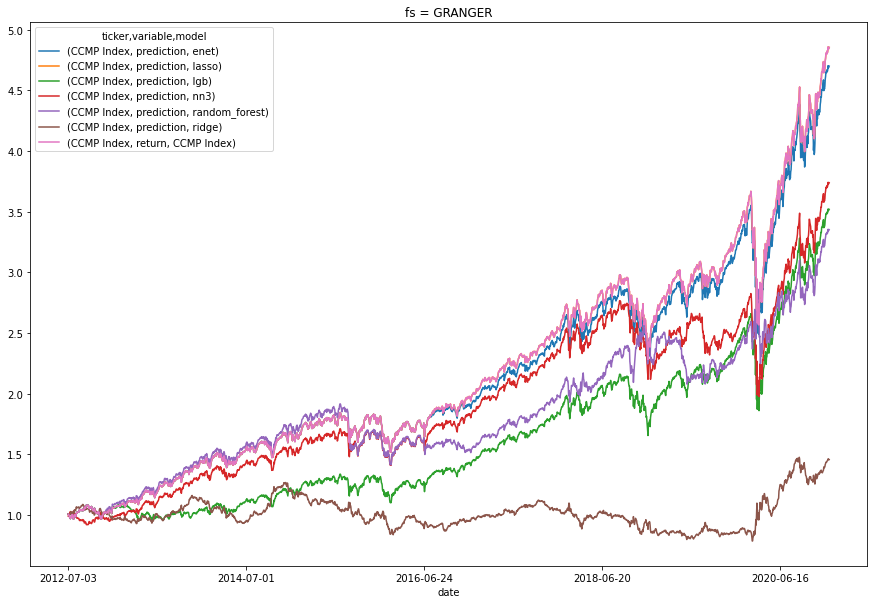

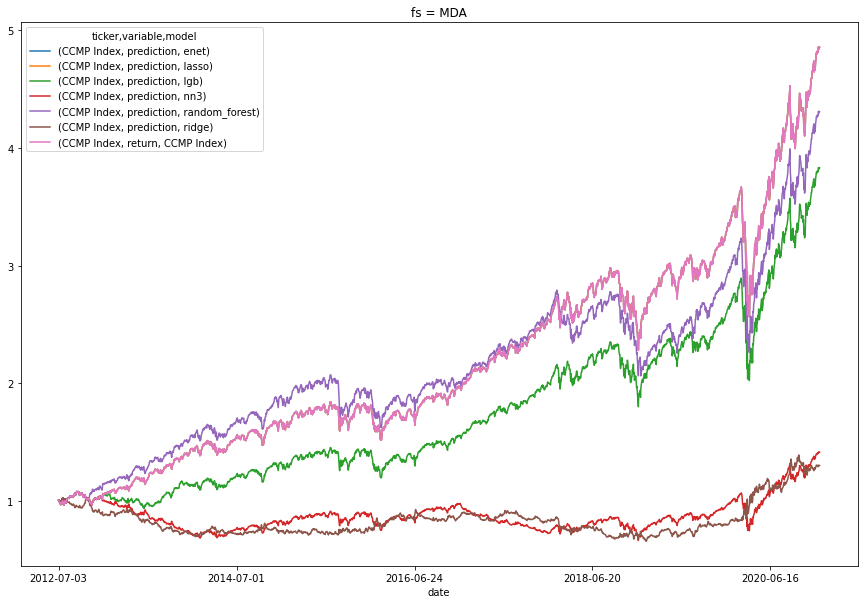

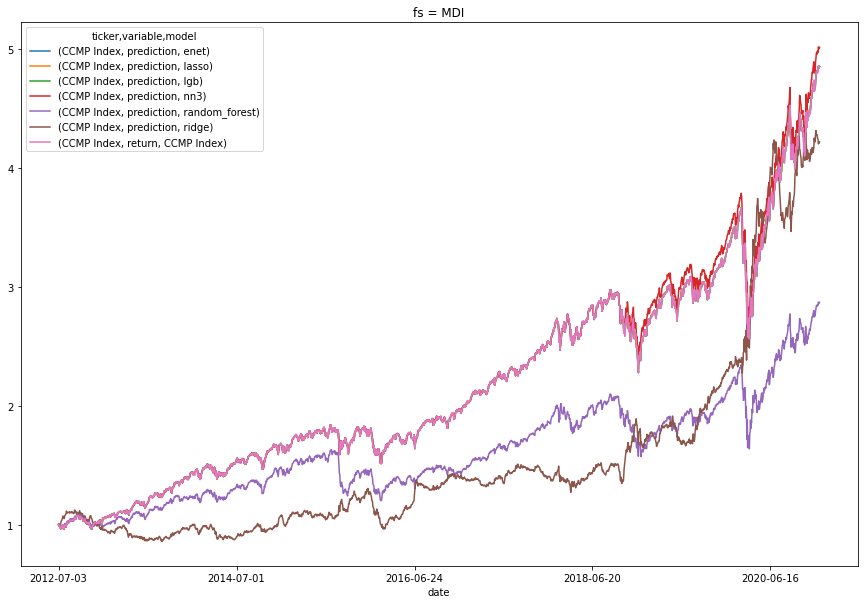

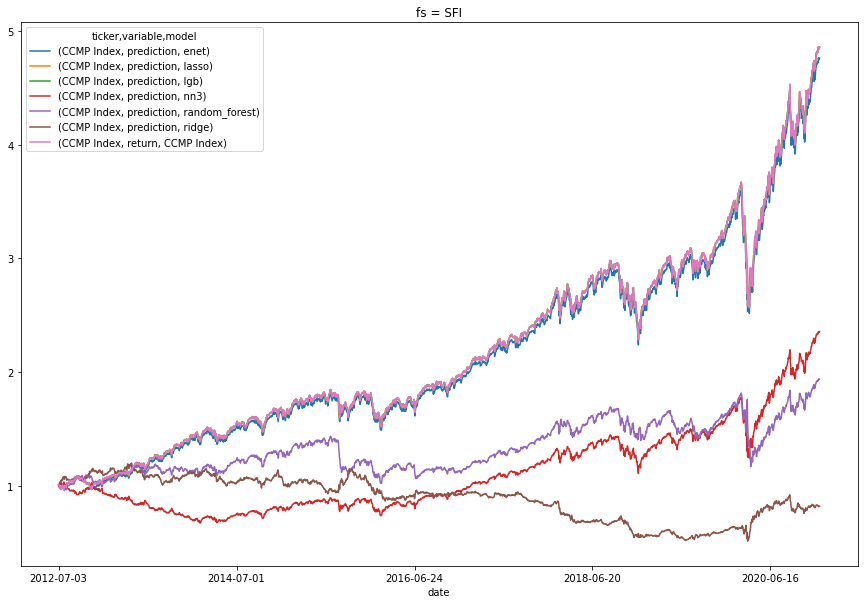

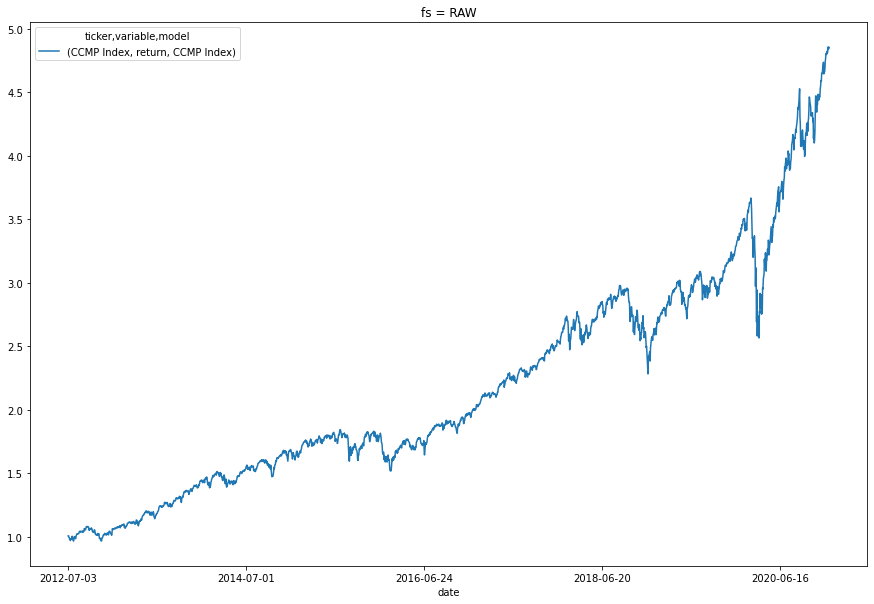

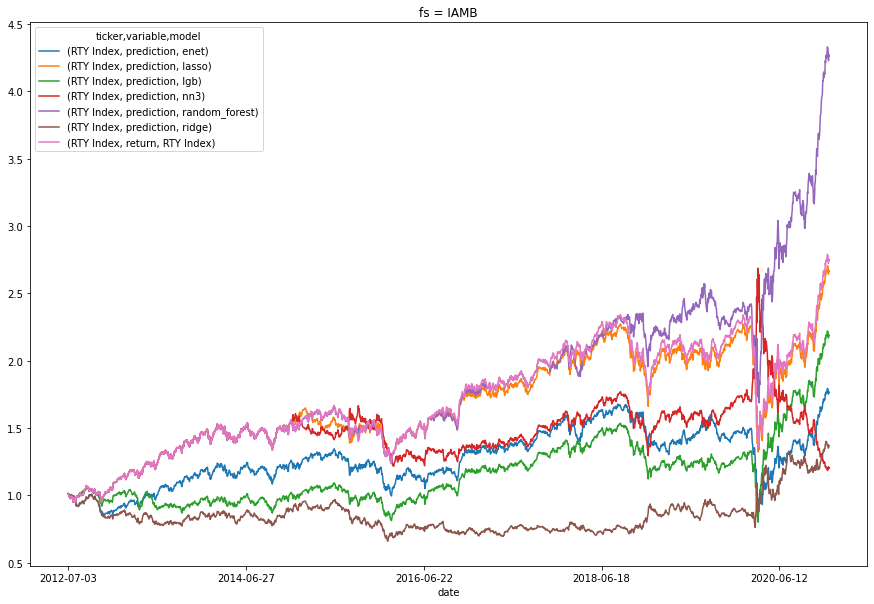

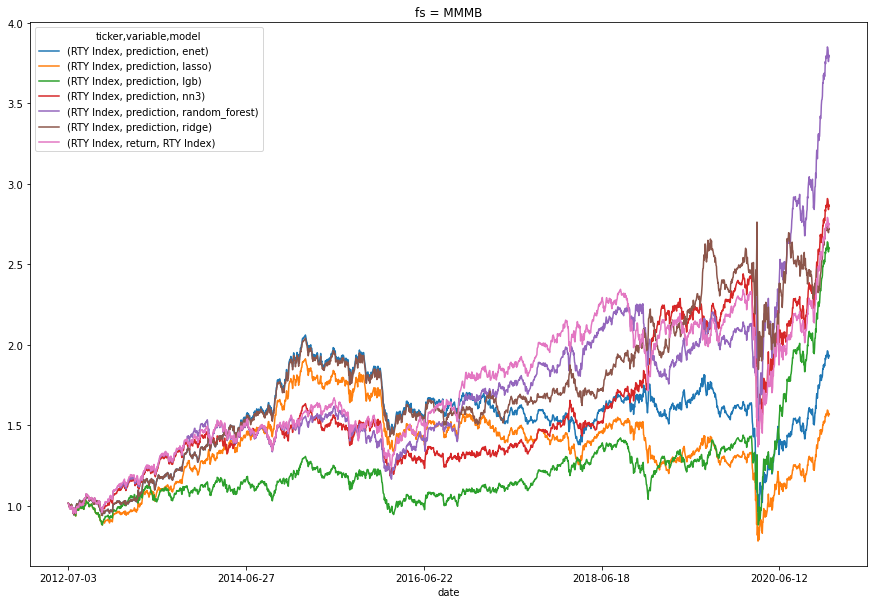

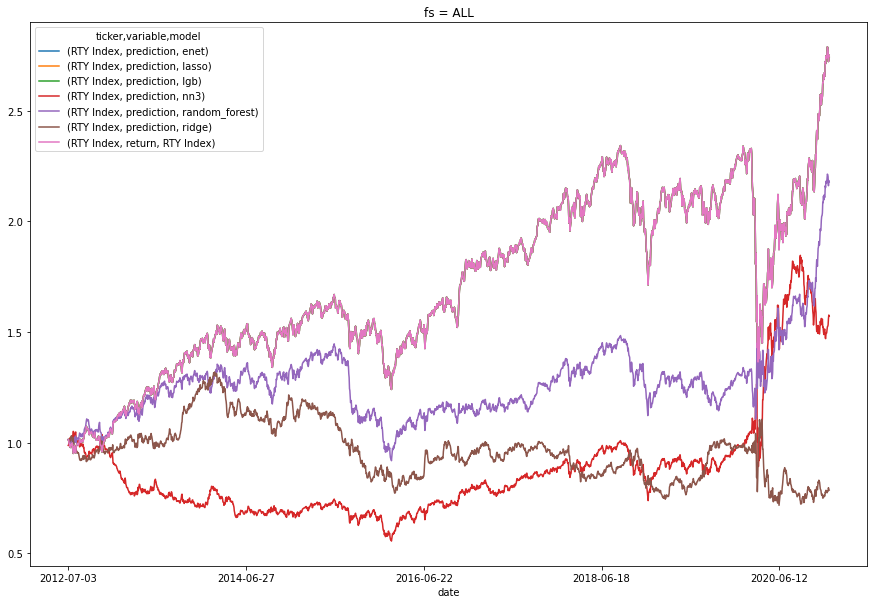

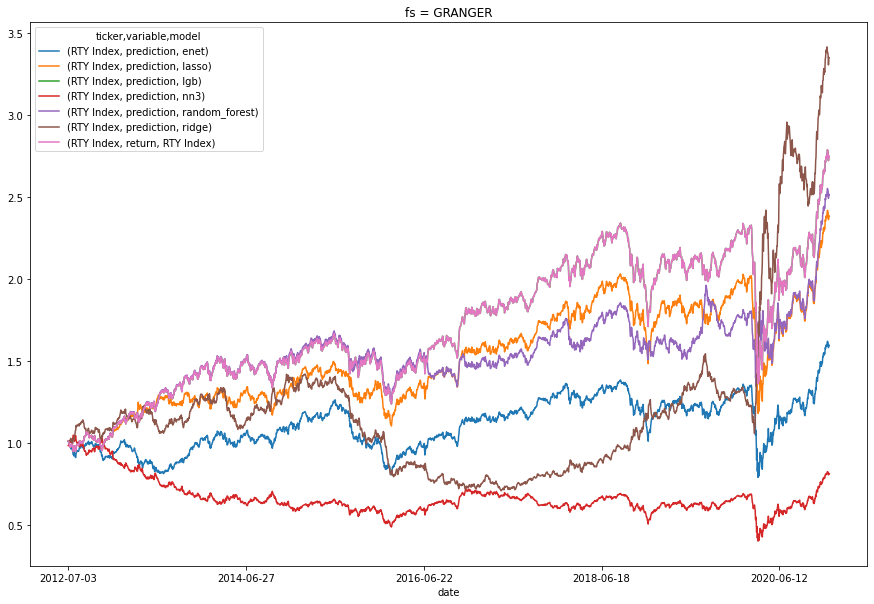

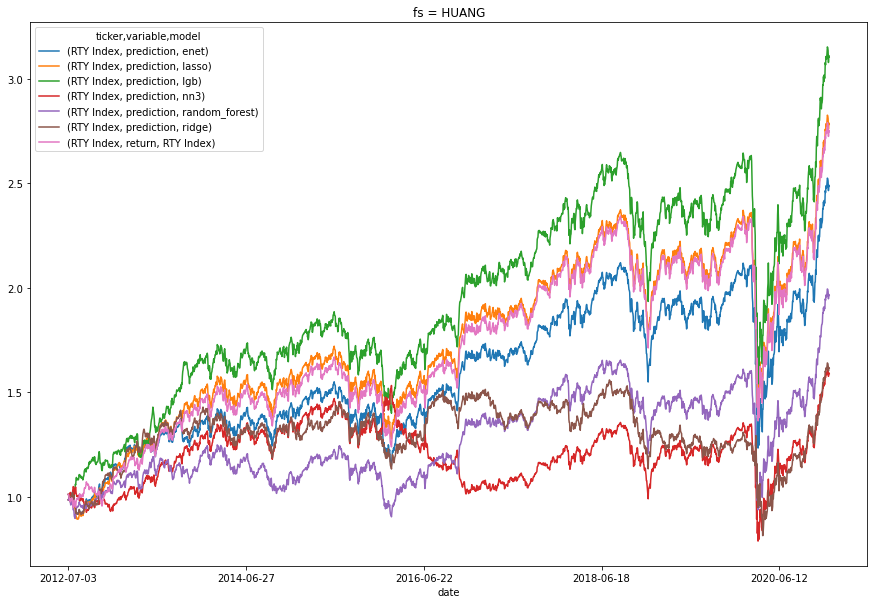

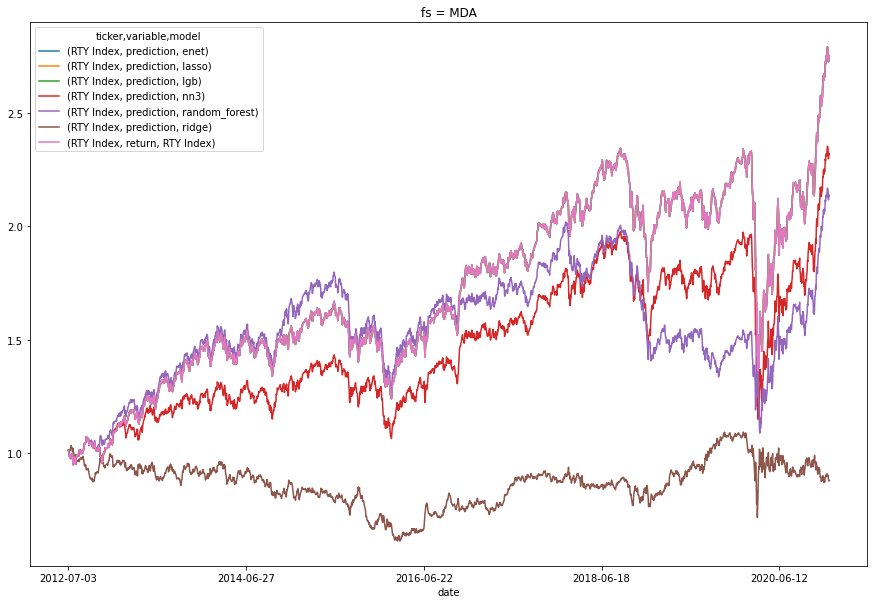

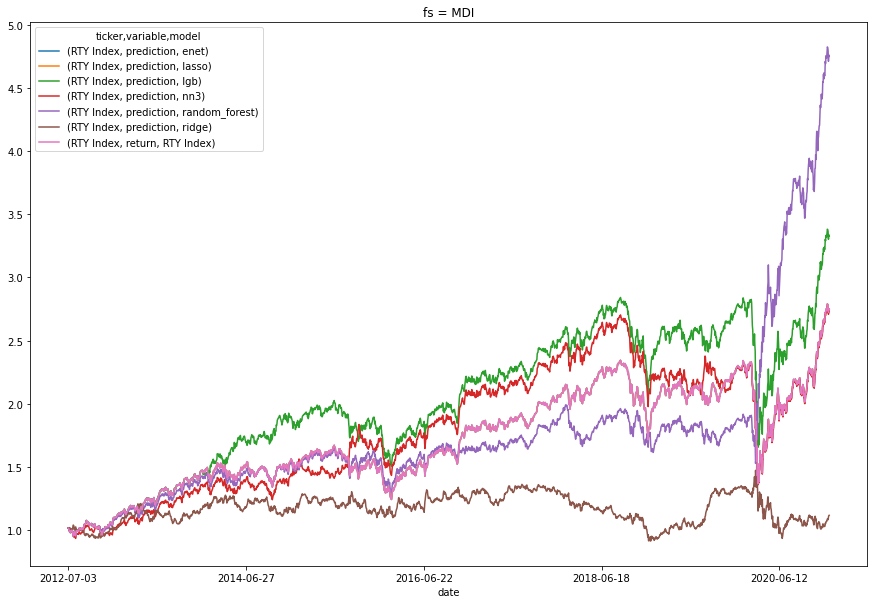

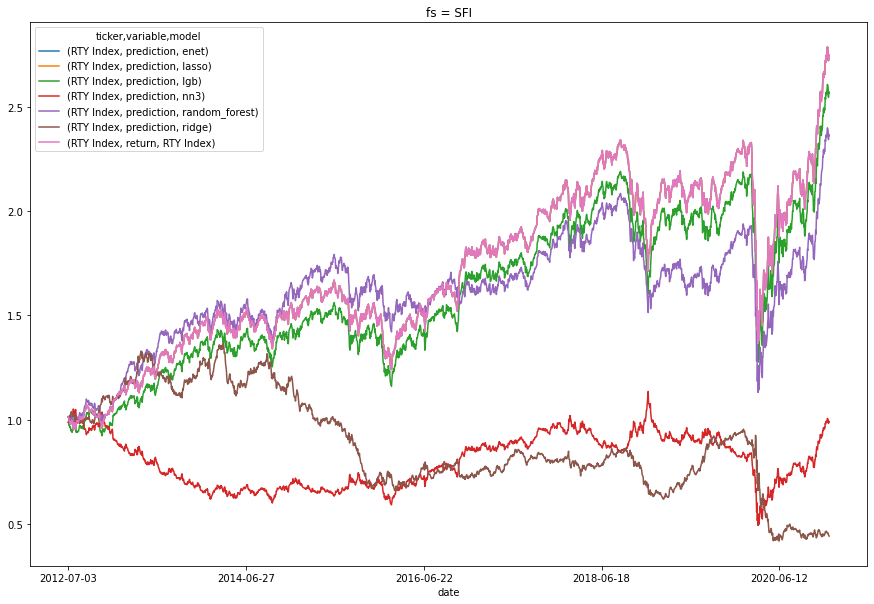

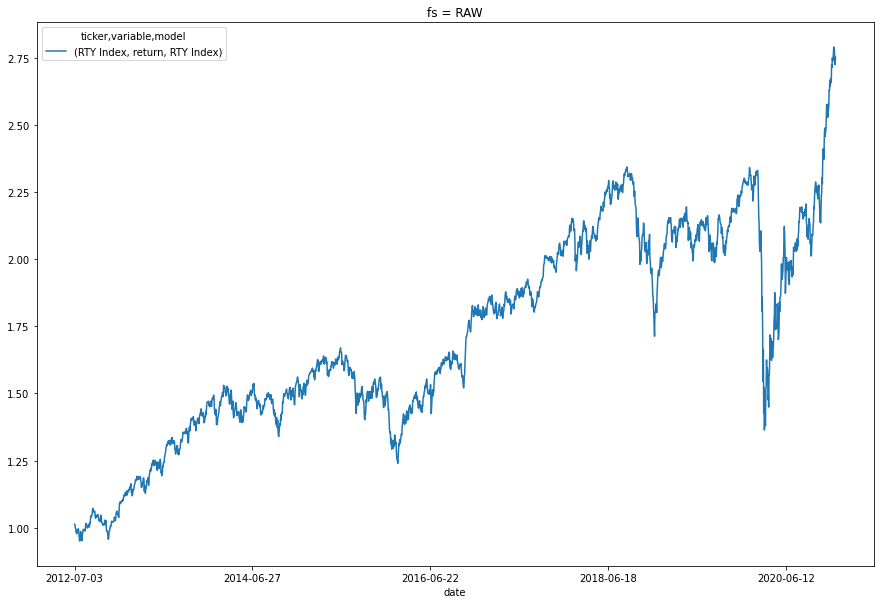

In [10]:
cum_ret_df2 = plot_cum_ret(pred_ret_df=pred_ret_df,
                           benchmark_df=melt_benchmark_df,
                           level_to_subset='fs',
                           show=True)

## Grouped by Prediction model

/home/felsal/.local/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


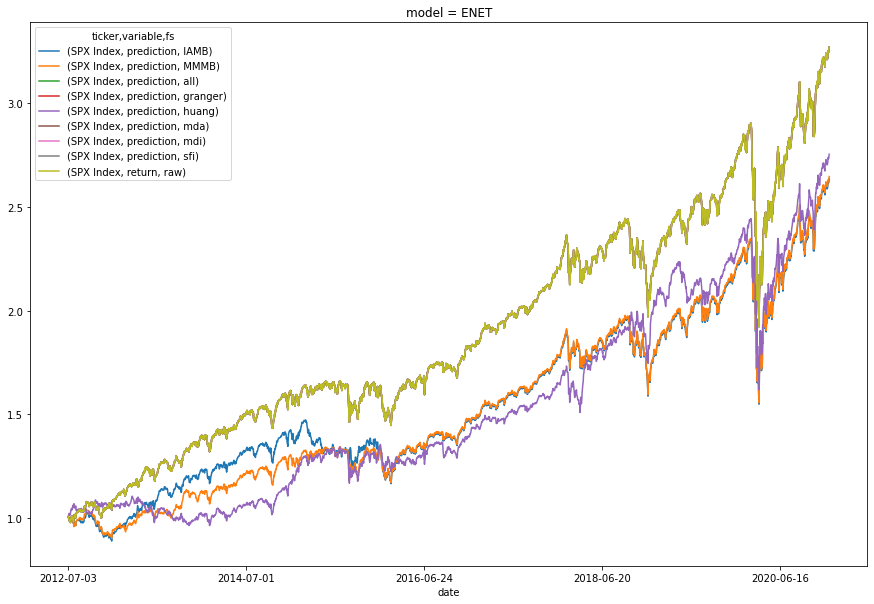

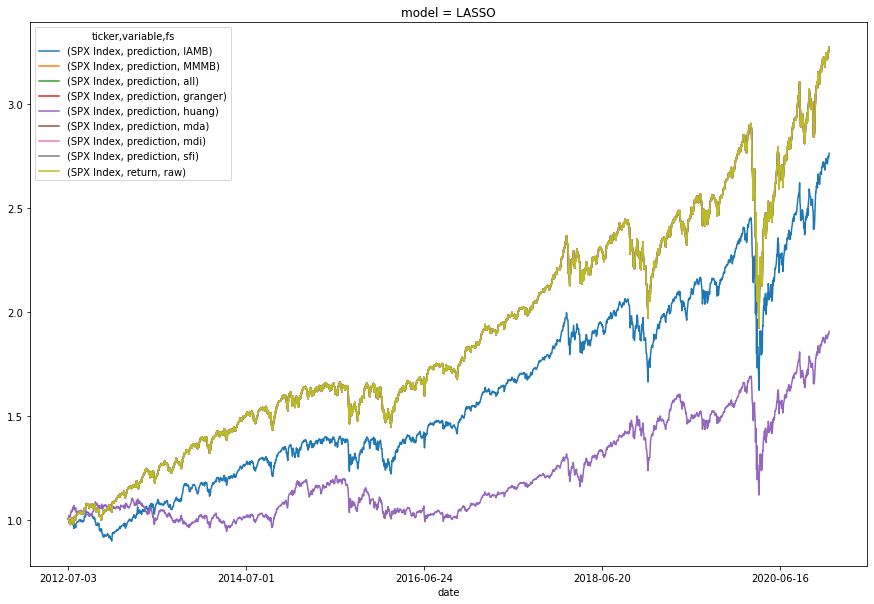

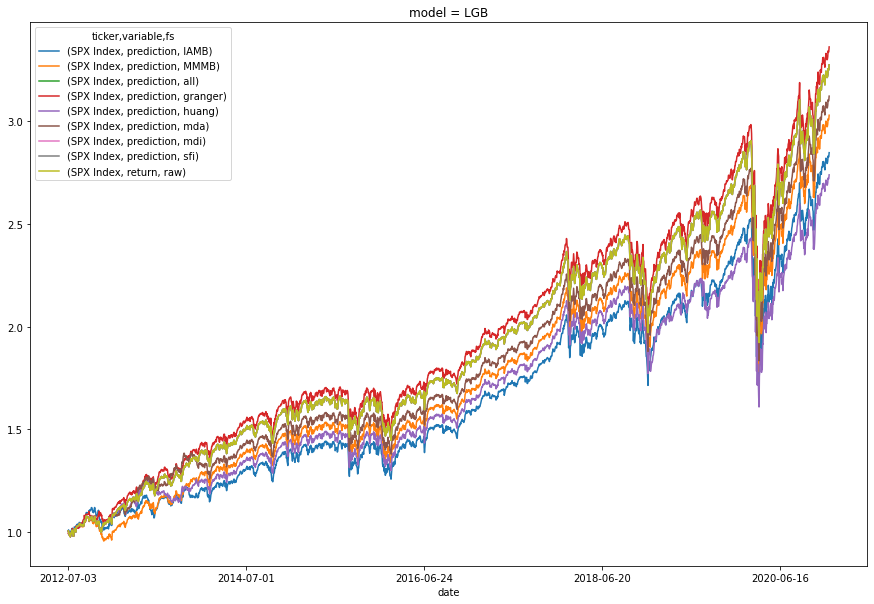

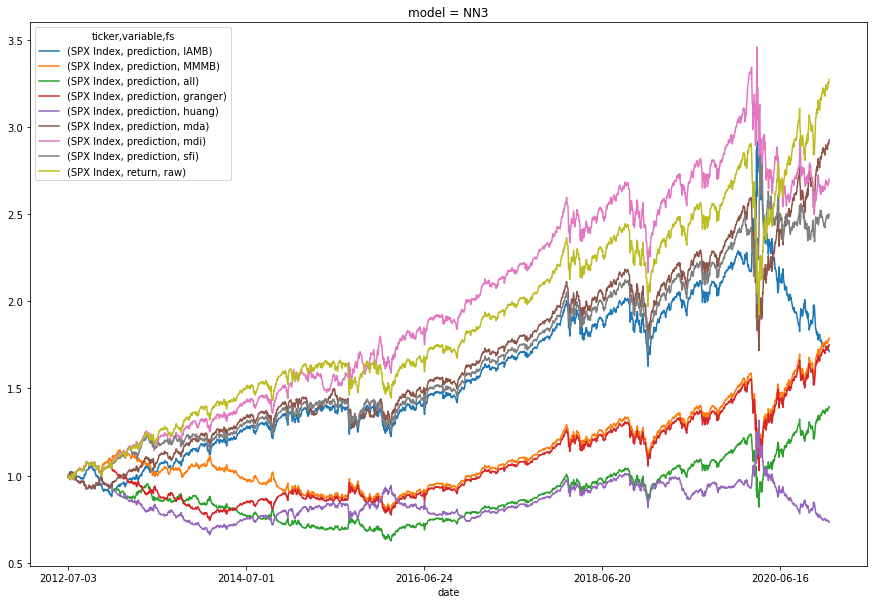

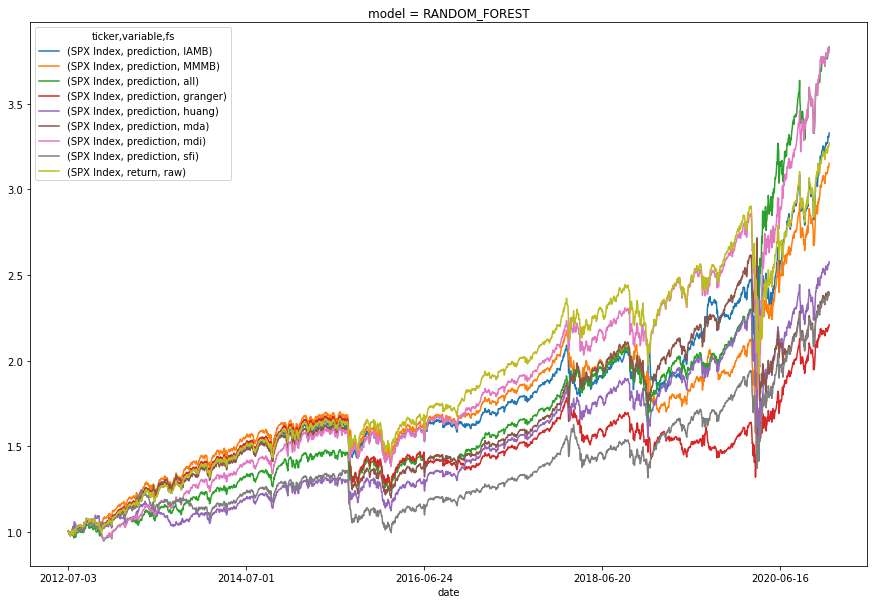

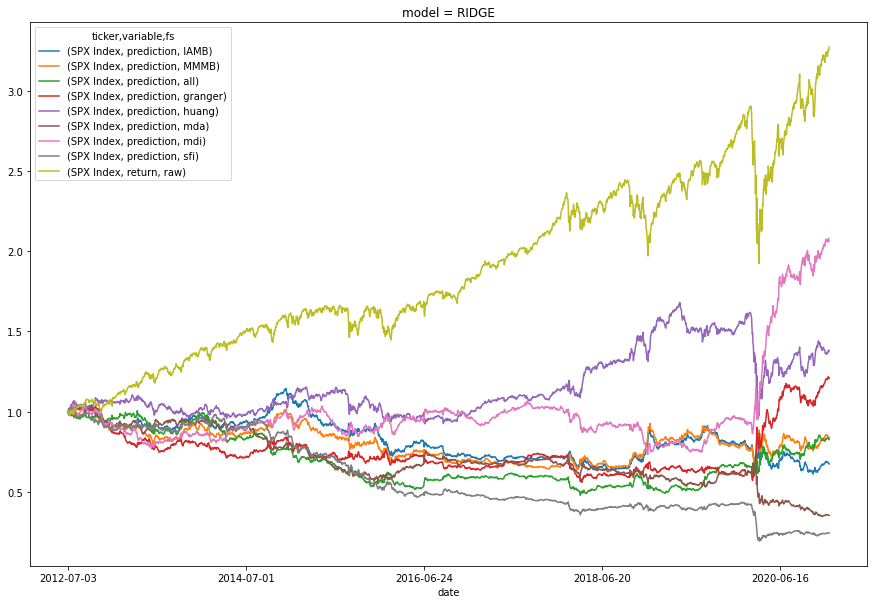

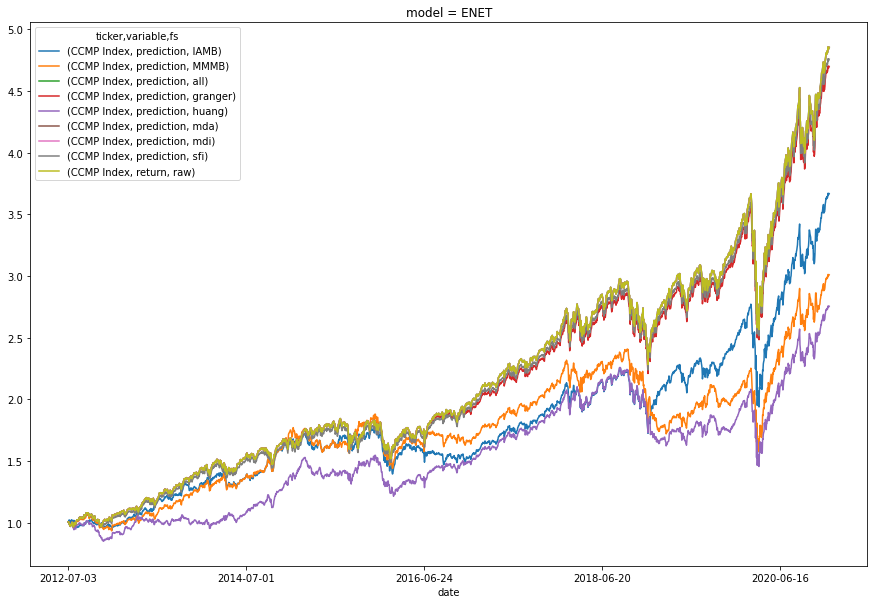

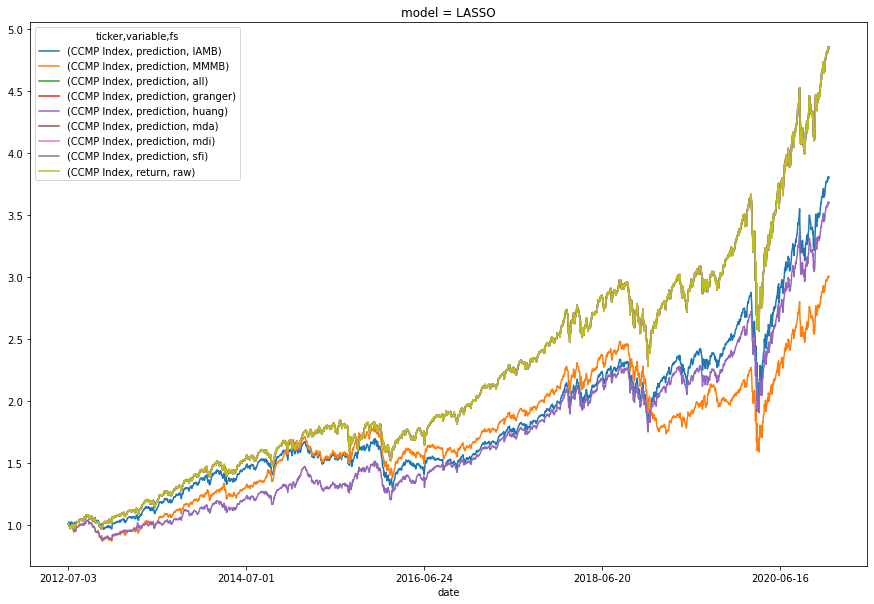

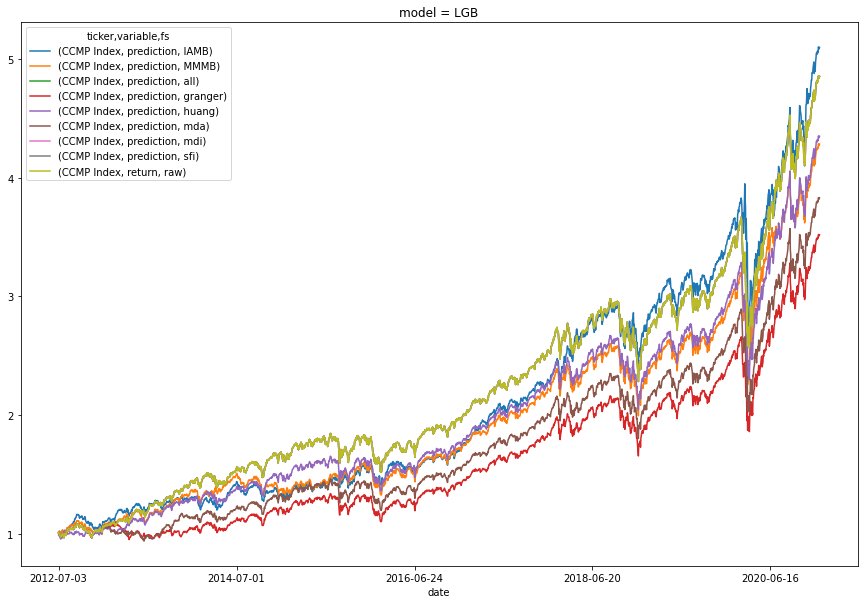

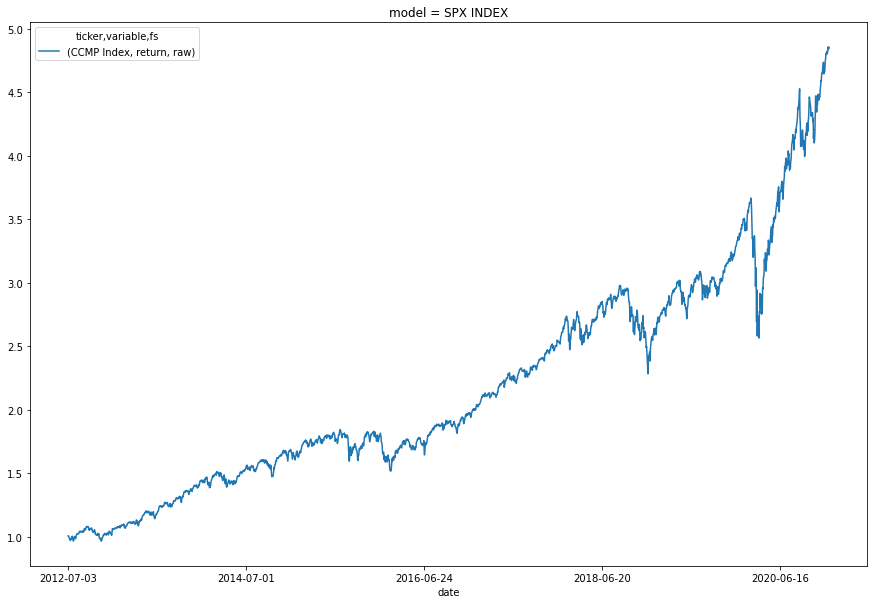

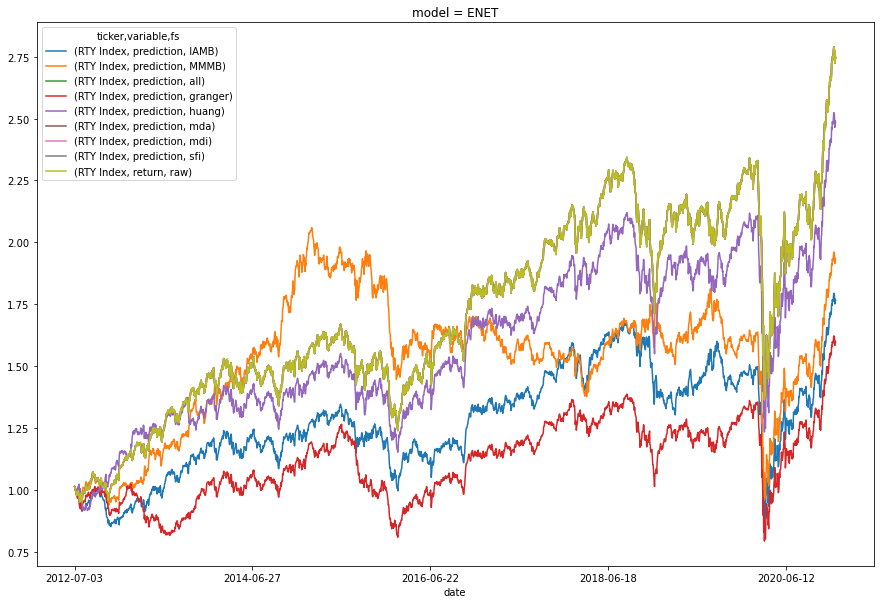

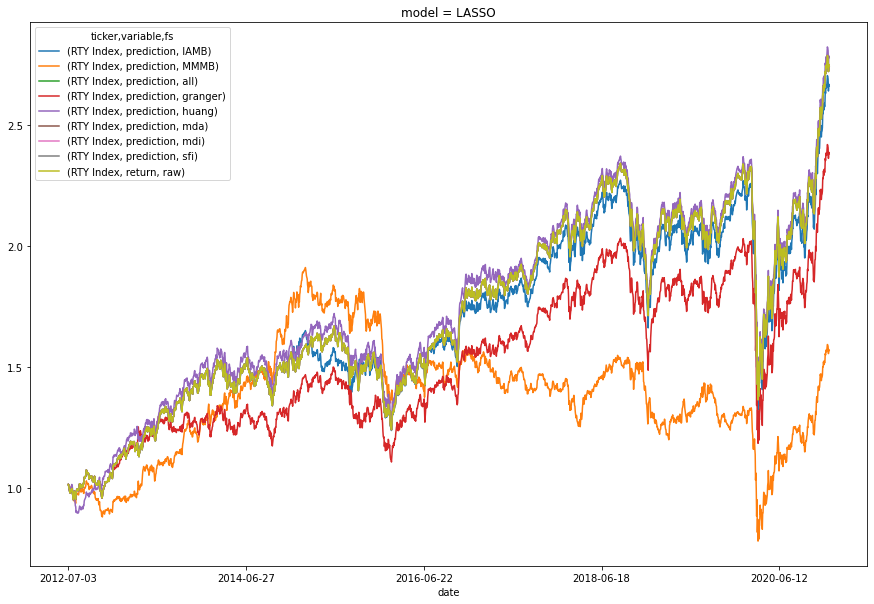

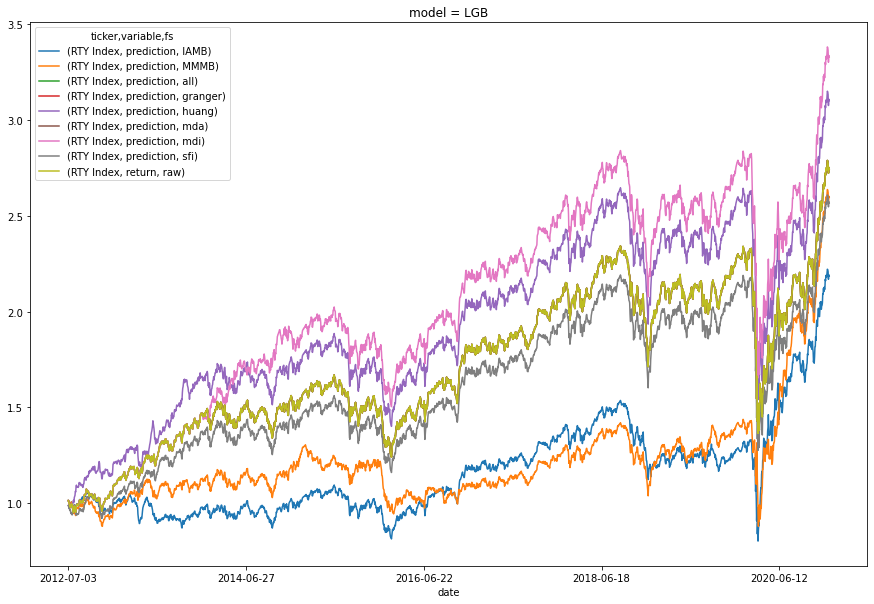

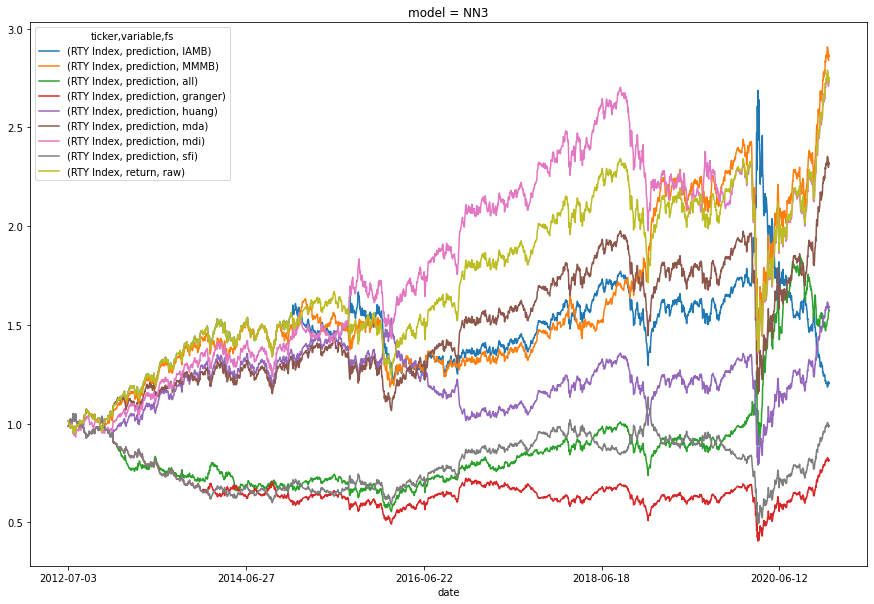

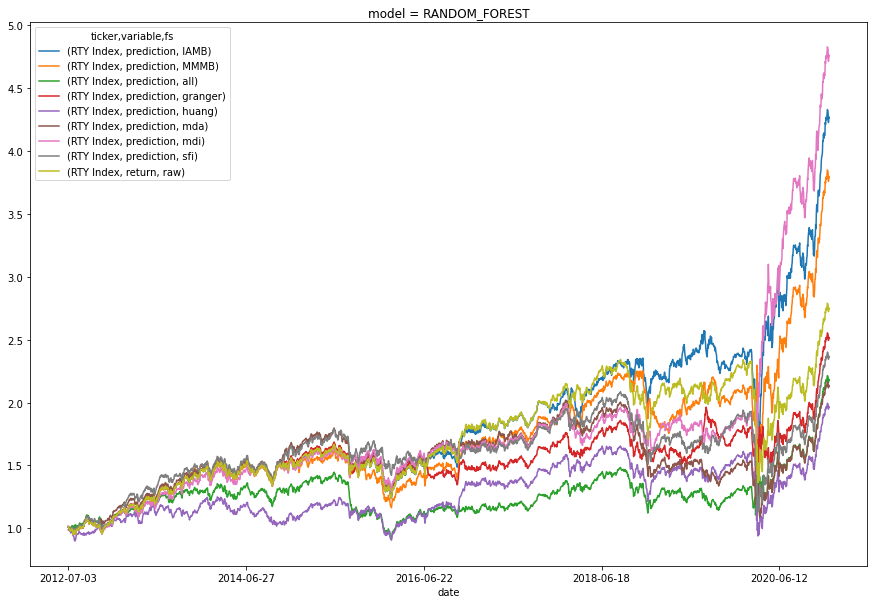

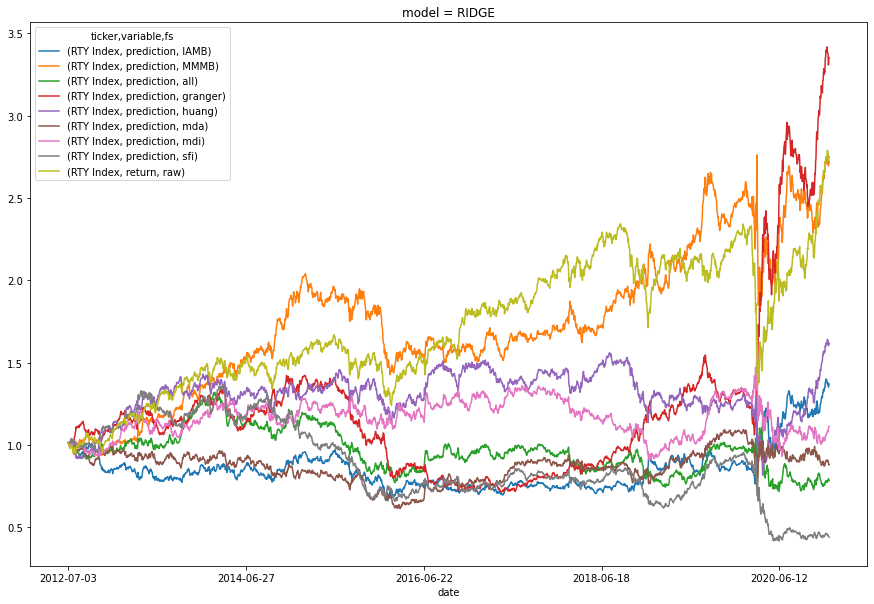

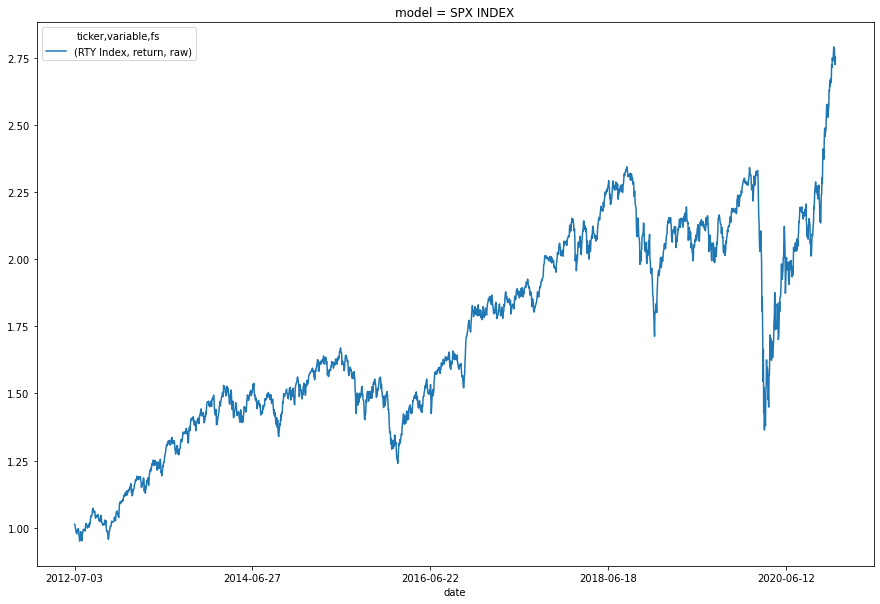

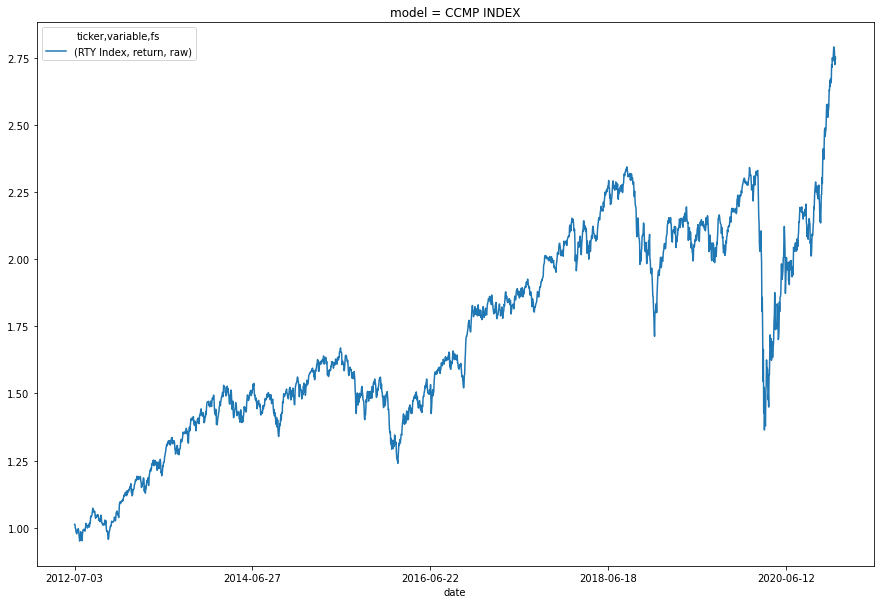

In [11]:
cum_ret_df2 = plot_cum_ret(pred_ret_df=pred_ret_df,
                           benchmark_df=melt_benchmark_df,
                           level_to_subset='model',
                           show=True)

# Sharpe ratio

In [12]:
ret_all_df = pd.concat([pred_ret_df, melt_benchmark_df], axis=0)
pivot_ret_all_df = ret_all_df.pivot_table(index=['date'], columns=['variable', 'ticker', 'model', 'fs'], values=['value'])

In [13]:
sr_rank_df, sr_tb_df, sr_agg_df = sharpe_ratio_tb(returns_df=ret_all_df,
                                                  level_to_subset='fs',
                                                  rf=.0)

In [14]:
sr_rank_df

sharpe ratio
ticker     variable   model      fs                
CCMP Index prediction lgb        IAMB      1.113725
                      nn3        mdi       1.103188
                      lasso      all       1.082699
           return     CCMP Index raw       1.082699
           prediction lgb        sfi       1.082699
...                                             ...
SPX Index  prediction ridge      IAMB     -0.190322
RTY Index  prediction ridge      sfi      -0.354051
CCMP Index prediction nn3        IAMB     -0.453832
SPX Index  prediction ridge      mda      -0.641744
                                 sfi      -0.900632

[147 rows x 1 columns]

## BoxPlot

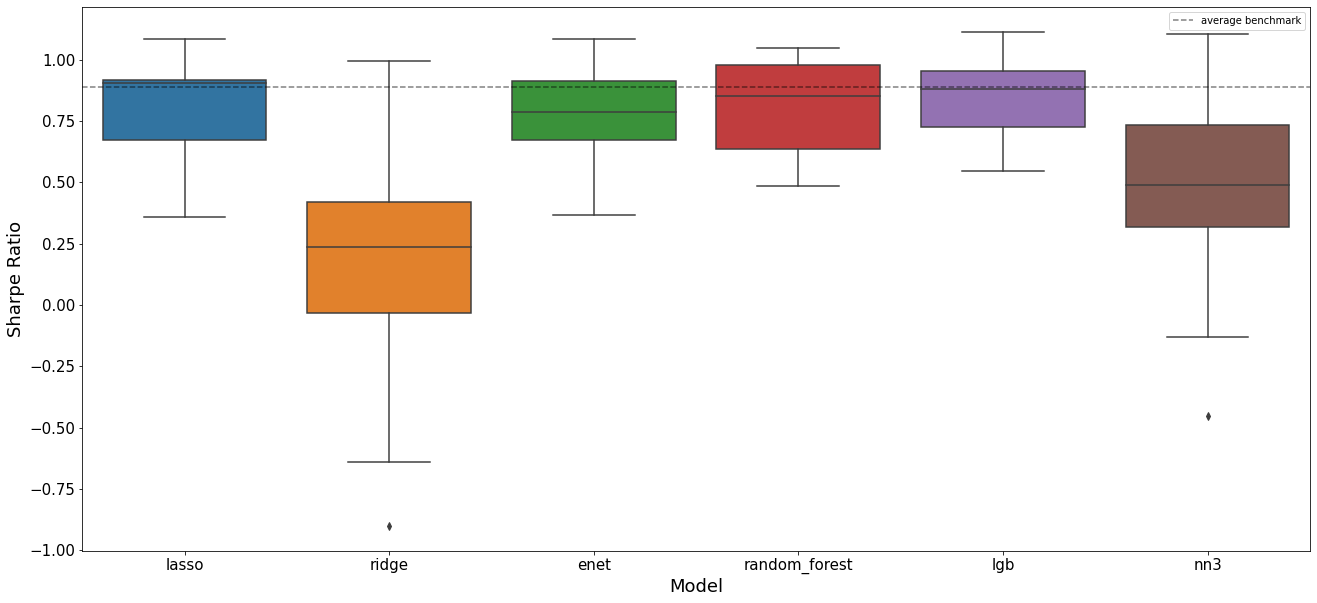

In [16]:
new = sr_rank_df.reset_index()
mean = new.loc[new['fs']=="raw"]
mean = mean["sharpe ratio"].mean()

new = new.loc[new['fs']!="raw"]
new = new[["model", "sharpe ratio"]]
new.loc[:, 'sharpe ratio'] = new['sharpe ratio'].astype(float)

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(22,10))
sns.boxplot(x="model", y='sharpe ratio',data=new, ax=ax, order=PREDICTION_MODEL);
ax.set_ylabel("Sharpe Ratio", fontsize=18);
ax.set_xlabel("Model", fontsize=18);
ax.axhline(y=mean, color='k', linestyle='--', alpha=0.5, label="average benchmark")
ax.tick_params(axis="x", labelsize=15);
ax.tick_params(axis="y", labelsize=15);
ax.legend(loc="best");


In [17]:
sr_tb_df

sharpe ratio                                          \
model                CCMP Index RTY Index SPX Index      enet     lasso   
ticker     fs                                                             
CCMP Index IAMB        0.000000  0.000000    0.0000  0.907067  0.930225   
           MMMB        0.000000  0.000000    0.0000  0.783291  0.782037   
           all         0.000000  0.000000    0.0000  1.082699  1.082699   
           granger     0.000000  0.000000    0.0000  1.062401  1.082699   
           huang       0.000000  0.000000    0.0000  0.727903  0.895620   
           mda         0.000000  0.000000    0.0000  1.082699  1.082699   
           mdi         0.000000  0.000000    0.0000  1.082699  1.082699   
           raw         1.082699  0.000000    0.0000  0.000000  0.000000   
           sfi         0.000000  0.000000    0.0000  1.070227  1.082699   
RTY Index  IAMB        0.000000  0.000000    0.0000  0.425071  0.656035   
           MMMB        0.000000  0.000000    0.0000  0.474912  0.358212   
           all         0.000000  0.000000    0.0000  0.673048  0.673048   
           granger     0.000000  0.000000    0.0000  0.368561  0.593313   
           huang       0.000000  0.000000    0.0000  0.616882  0.680188   
           mda         0.000000  0.000000    0.0000  0.673048  0.673048   
           mdi         0.000000  0.000000    0.0000  0.673048  0.673048   
           raw         0.000000  0.673048    0.0000  0.000000  0.000000   
           sfi         0.000000  0.000000    0.0000  0.673048  0.673048   
SPX Index  IAMB        0.000000  0.000000    0.0000  0.762091  0.794736   
           MMMB        0.000000  0.000000    0.0000  0.764929  0.913600   
           all         0.000000  0.000000    0.0000  0.913600  0.913600   
           granger     0.000000  0.000000    0.0000  0.913600  0.913600   
           huang       0.000000  0.000000    0.0000  0.792818  0.535066   
           mda         0.000000  0.000000    0.0000  0.913600  0.913600   
           mdi         0.000000  0.000000    0.0000  0.913600  0.913600   
           raw         0.000000  0.000000    0.9136  0.000000  0.000000   
           sfi         0.000000  0.000000    0.0000  0.913600  0.913600   

                                                                
model                    lgb       nn3 random_forest     ridge  
ticker     fs                                                   
CCMP Index IAMB     1.113725 -0.453832      1.046699  0.550167  
           MMMB     1.004236  0.482371      0.955236  0.679997  
           all      1.082699  0.763791      0.986802  0.146710  
           granger  0.881050  0.918978      0.850376  0.329312  
           huang    1.013903  0.813630      0.979393  0.309232  
           mda      0.934035  0.312139      1.007873  0.259351  
           mdi      1.082699  1.103188      0.754044  0.994023  
           raw      0.000000  0.000000      0.000000  0.000000  
           sfi      1.082699  0.629204      0.507442 -0.029599  
RTY Index  IAMB     0.544929  0.208213      0.919642  0.280926  
           MMMB     0.641058  0.696166      0.853431  0.666210  
           all      0.673048  0.359209      0.542302 -0.030481  
           granger  0.673048 -0.008697      0.622462  0.783460  
           huang    0.741627  0.366100      0.484578  0.374977  
           mda      0.673048  0.577267      0.530673  0.033798  
           mdi      0.781503  0.669784      0.980795  0.166237  
           raw      0.000000  0.000000      0.000000  0.000000  
           sfi      0.635485  0.099904      0.588762 -0.354051  
SPX Index  IAMB     0.815709  0.459428      0.925699 -0.190322  
           MMMB     0.859163  0.491413      0.886952 -0.040131  
           all      0.913600  0.317609      1.023986 -0.048902  
           granger  0.932157  0.476327      0.638345  0.215433  
           huang    0.788681 -0.132437      0.746478  0.310953  
           mda      0.880327  0.834678      0.692309 -0.641744  
           md

In [18]:
sr_agg_df

sum    median  median_std_adj
ticker     fs                                         
CCMP Index IAMB     4.094052  0.918646        1.557629
           MMMB     4.687168  0.782664        4.129826
           all      5.145399  1.034750        2.799966
           granger  5.124815  0.900014        3.282019
           huang    4.739680  0.854625        3.313047
           mda      4.678795  0.970954        2.508874
           mdi      6.099352  1.082699        8.067718
           raw      1.082699  1.082699             NaN
           sfi      4.342672  0.849716        1.899075
RTY Index  IAMB     3.034815  0.485000        1.857129
           MMMB     3.689989  0.653634        3.745110
           all      2.890174  0.607675        2.173464
           granger  3.032146  0.607888        2.123156
           huang    3.264351  0.550730        3.460171
           mda      3.160883  0.625158        2.511592
           mdi      3.944415  0.673048        2.501811
           raw      0.673048  0.673048             NaN
           sfi      2.316196  0.612123        1.444656
SPX Index  IAMB     3.567341  0.778414        1.875833
           MMMB     3.875925  0.812046        2.195645
           all      4.033493  0.913600        2.102261
           granger  4.089462  0.775973        2.640688
           huang    3.041560  0.640772        1.755063
           mda      3.592770  0.857503        1.398140
           mdi      5.127615  0.913600        6.079615
           raw      0.913600  0.913600             NaN
           sfi      3.259995  0.818957        1.146265

In [19]:
sr_rank_df1, sr_tb_df1, sr_agg_df1 = sharpe_ratio_tb(returns_df=ret_all_df,
                                                     level_to_subset='model',
                                                     rf=.0)

In [20]:
sr_rank_df1

sharpe ratio
ticker     variable   fs      model              
CCMP Index prediction IAMB    lgb        1.113725
                      mdi     nn3        1.103188
                      mda     enet       1.082699
                      mdi     lgb        1.082699
                      granger lasso      1.082699
...                                           ...
SPX Index  prediction IAMB    ridge     -0.190322
RTY Index  prediction sfi     ridge     -0.354051
CCMP Index prediction IAMB    nn3       -0.453832
SPX Index  prediction mda     ridge     -0.641744
                      sfi     ridge     -0.900632

[147 rows x 1 columns]

In [21]:
sr_tb_df1

sharpe ratio                                          \
fs                               IAMB      MMMB       all   granger     huang   
ticker     model                                                                
CCMP Index CCMP Index        0.000000  0.000000  0.000000  0.000000  0.000000   
           enet              0.907067  0.783291  1.082699  1.062401  0.727903   
           lasso             0.930225  0.782037  1.082699  1.082699  0.895620   
           lgb               1.113725  1.004236  1.082699  0.881050  1.013903   
           nn3              -0.453832  0.482371  0.763791  0.918978  0.813630   
           random_forest     1.046699  0.955236  0.986802  0.850376  0.979393   
           ridge             0.550167  0.679997  0.146710  0.329312  0.309232   
RTY Index  RTY Index         0.000000  0.000000  0.000000  0.000000  0.000000   
           enet              0.425071  0.474912  0.673048  0.368561  0.616882   
           lasso             0.656035  0.358212  0.673048  0.593313  0.680188   
           lgb               0.544929  0.641058  0.673048  0.673048  0.741627   
           nn3               0.208213  0.696166  0.359209 -0.008697  0.366100   
           random_forest     0.919642  0.853431  0.542302  0.622462  0.484578   
           ridge             0.280926  0.666210 -0.030481  0.783460  0.374977   
SPX Index  SPX Index         0.000000  0.000000  0.000000  0.000000  0.000000   
           enet              0.762091  0.764929  0.913600  0.913600  0.792818   
           lasso             0.794736  0.913600  0.913600  0.913600  0.535066   
           lgb               0.815709  0.859163  0.913600  0.932157  0.788681   
           nn3               0.459428  0.491413  0.317609  0.476327 -0.132437   
           random_forest     0.925699  0.886952  1.023986  0.638345  0.746478   
           ridge            -0.190322 -0.040131 -0.048902  0.215433  0.310953   

                                                                  
fs                             mda       mdi       raw       sfi  
ticker     model                                                  
CCMP Index CCMP Index     0.000000  0.000000  1.082699  0.000000  
           enet           1.082699  1.082699  0.000000  1.070227  
           lasso          1.082699  1.082699  0.000000  1.082699  
           lgb            0.934035  1.082699  0.000000  1.082699  
           nn3            0.312139  1.103188  0.000000  0.629204  
           random_forest  1.007873  0.754044  0.000000  0.507442  
           ridge          0.259351  0.994023  0.000000 -0.029599  
RTY Index  RTY Index      0.000000  0.000000  0.673048  0.000000  
           enet           0.673048  0.673048  0.000000  0.673048  
           lasso          0.673048  0.673048  0.000000  0.673048  
           lgb            0.673048  0.781503  0.000000  0.635485  
           nn3            0.577267  0.669784  0.000000  0.099904  
           random_forest  0.530673  0.980795  0.000000  0.588762  
           ridge          0.033798  0.166237  0.000000 -0.354051  
SPX Index  SPX Index      0.000000  0.000000  0.913600  0.000000  
           enet           0.913600  0.913600  0.000000  0.913600  
           lasso          0.913600  0.913600  0.000000  0.913600  
           lgb            0.880327  0.913600  0.000000  0.913600  
           nn3            0.834678  0.778677  0.000000  0.724314  
           random_forest  0.692309  1.018073  0.000000  0.695513  
           ridge         -0.641744  0.590065  0.000000 -0.900632

In [22]:
sr_agg_df1

sum    median  median_std_adj
ticker     model                                            
CCMP Index CCMP Index     1.082699  1.082699             NaN
           enet           7.798986  1.066314        7.190761
           lasso          8.021377  1.082699        9.178142
           lgb            8.195046  1.048301       12.738339
           nn3            4.569469  0.696498        1.443856
           random_forest  7.087864  0.967314        5.379406
           ridge          3.239191  0.319272        0.985062
RTY Index  RTY Index      0.673048  0.673048             NaN
           enet           4.577617  0.644965        5.026296
           lasso          4.979941  0.673048        6.094452
           lgb            5.363745  0.673048        9.483010
           nn3            2.967945  0.362654        1.382209
           random_forest  5.522646  0.605612        3.093871
           ridge          1.921075  0.223581        0.600335
SPX Index  SPX Index      0.913600  0.913600             NaN
           enet           6.887837  0.913600       12.482952
           lasso          6.811402  0.913600        6.796348
           lgb            7.016837  0.896964       17.240672
           nn3            3.950009  0.483870        1.557981
           random_forest  6.627356  0.816715        5.301352
           ridge         -0.705280 -0.044516       -0.090538

## Maximum drawdown

In [23]:
md_rank_df, md_tb_df, md_agg_df = max_drawdown_tb(pivot_ret_all_df=pivot_ret_all_df,
                                                  level_to_subset='fs')

In [24]:
md_rank_df

max drawdown
variable   ticker     model         fs                   
prediction SPX Index  random_forest all         -0.214737
                      nn3           sfi         -0.219324
           CCMP Index random_forest huang       -0.227509
           RTY Index  random_forest mdi         -0.233430
           CCMP Index ridge         MMMB        -0.234385
...                                                   ...
           RTY Index  nn3           granger     -0.614440
           CCMP Index nn3           IAMB        -0.628312
           SPX Index  ridge         mda         -0.663164
           RTY Index  ridge         sfi         -0.694867
           SPX Index  ridge         sfi         -0.812787

[147 rows x 1 columns]

In [25]:
md_tb_df

max drawdown                                          \
model                CCMP Index RTY Index SPX Index      enet     lasso   
ticker     fs                                                             
CCMP Index IAMB        0.000000  0.000000  0.000000 -0.300401 -0.300401   
           MMMB        0.000000  0.000000  0.000000 -0.345550 -0.359616   
           all         0.000000  0.000000  0.000000 -0.300401 -0.300401   
           granger     0.000000  0.000000  0.000000 -0.300401 -0.300401   
           huang       0.000000  0.000000  0.000000 -0.355155 -0.300401   
           mda         0.000000  0.000000  0.000000 -0.300401 -0.300401   
           mdi         0.000000  0.000000  0.000000 -0.300401 -0.300401   
           raw        -0.300401  0.000000  0.000000  0.000000  0.000000   
           sfi         0.000000  0.000000  0.000000 -0.300401 -0.300401   
RTY Index  IAMB        0.000000  0.000000  0.000000 -0.477239 -0.417857   
           MMMB        0.000000  0.000000  0.000000 -0.534343 -0.592542   
           all         0.000000  0.000000  0.000000 -0.417857 -0.417857   
           granger     0.000000  0.000000  0.000000 -0.427997 -0.417857   
           huang       0.000000  0.000000  0.000000 -0.417857 -0.417857   
           mda         0.000000  0.000000  0.000000 -0.417857 -0.417857   
           mdi         0.000000  0.000000  0.000000 -0.417857 -0.417857   
           raw         0.000000 -0.417857  0.000000  0.000000  0.000000   
           sfi         0.000000  0.000000  0.000000 -0.417857 -0.417857   
SPX Index  IAMB        0.000000  0.000000  0.000000 -0.337904 -0.337904   
           MMMB        0.000000  0.000000  0.000000 -0.337904 -0.337904   
           all         0.000000  0.000000  0.000000 -0.337904 -0.337904   
           granger     0.000000  0.000000  0.000000 -0.337904 -0.337904   
           huang       0.000000  0.000000  0.000000 -0.337904 -0.337904   
           mda         0.000000  0.000000  0.000000 -0.337904 -0.337904   
           mdi         0.000000  0.000000  0.000000 -0.337904 -0.337904   
           raw         0.000000  0.000000 -0.337904  0.000000  0.000000   
           sfi         0.000000  0.000000  0.000000 -0.337904 -0.337904   

                                                                
model                    lgb       nn3 random_forest     ridge  
ticker     fs                                                   
CCMP Index IAMB    -0.331247 -0.628312     -0.284013 -0.302643  
           MMMB    -0.296067 -0.341144     -0.332835 -0.234385  
           all     -0.300401 -0.300401     -0.291560 -0.374060  
           granger -0.300401 -0.300401     -0.261745 -0.380741  
           huang   -0.300401 -0.300401     -0.227509 -0.327945  
           mda     -0.300401 -0.384091     -0.300401 -0.358899  
           mdi     -0.300401 -0.300401     -0.300401 -0.258999  
           raw      0.000000  0.000000      0.000000  0.000000  
           sfi     -0.300401 -0.348826     -0.356067 -0.570474  
RTY Index  IAMB    -0.478138 -0.558927     -0.343668 -0.347147  
           MMMB    -0.388542 -0.417243     -0.367251 -0.331715  
           all     -0.417857 -0.472528     -0.365530 -0.457455  
           granger -0.417857 -0.614440     -0.313182 -0.499738  
           huang   -0.417857 -0.484908     -0.432462 -0.476798  
           mda     -0.417857 -0.417857     -0.460548 -0.406681  
           mdi     -0.417857 -0.498248     -0.233430 -0.418335  
           raw      0.000000  0.000000      0.000000  0.000000  
           sfi     -0.417857 -0.566801     -0.458162 -0.694867  
SPX Index  IAMB    -0.337904 -0.443924     -0.253855 -0.465906  
           MMMB    -0.337904 -0.337904     -0.271659 -0.378690  
           all     -0.337904 -0.388233     -0.214737 -0.526395  
           granger -0.337904 -0.337904     -0.260240 -0.465524  
           huang   -0.337904 -0.443924     -0.337904 -0.428313  
           mda     -0.337904 -0.337904     -0.350534 -0.663164  
           md

In [26]:
md_agg_df

sum    median  median_std_adj
ticker     fs                                         
CCMP Index IAMB    -2.147018 -0.300401       -1.446456
           MMMB    -1.909597 -0.296067       -1.813154
           all     -1.867225 -0.300401       -1.907072
           granger -1.844091 -0.300401       -1.916334
           huang   -1.811813 -0.300401       -1.941990
           mda     -1.944595 -0.300401       -1.823392
           mdi     -1.761006 -0.300401       -2.038588
           raw     -0.300401  0.000000        0.000000
           sfi     -2.176571 -0.300401       -1.506150
RTY Index  IAMB    -2.622976 -0.347147       -1.519511
           MMMB    -2.631636 -0.367251       -1.571164
           all     -2.549082 -0.417857       -1.948288
           granger -2.691070 -0.417857       -1.755808
           huang   -2.647738 -0.417857       -1.882023
           mda     -2.538656 -0.417857       -1.970274
           mdi     -2.403584 -0.417857       -1.970766
           raw     -0.417857  0.000000        0.000000
           sfi     -2.973400 -0.417857       -1.585758
SPX Index  IAMB    -2.177396 -0.337904       -1.761648
           MMMB    -2.001964 -0.337904       -1.998930
           all     -2.143076 -0.337904       -1.727294
           granger -2.077379 -0.337904       -1.868424
           huang   -2.223853 -0.337904       -1.781731
           mda     -2.365313 -0.337904       -1.515434
           mdi     -1.926405 -0.312951       -1.936517
           raw     -0.337904  0.000000        0.000000
           sfi     -2.339916 -0.294094       -1.143246

In [27]:
md_rank_df1, md_tb_df1, md_agg_df1 = max_drawdown_tb(pivot_ret_all_df=pivot_ret_all_df,
                                                     level_to_subset='model')

In [28]:
md_rank_df1

max drawdown
variable   ticker     model         fs                   
prediction SPX Index  random_forest all         -0.214737
                      nn3           sfi         -0.219324
           CCMP Index random_forest huang       -0.227509
           RTY Index  random_forest mdi         -0.233430
           CCMP Index ridge         MMMB        -0.234385
...                                                   ...
           RTY Index  nn3           granger     -0.614440
           CCMP Index nn3           IAMB        -0.628312
           SPX Index  ridge         mda         -0.663164
           RTY Index  ridge         sfi         -0.694867
           SPX Index  ridge         sfi         -0.812787

[147 rows x 1 columns]

In [29]:
md_tb_df1

max drawdown                                          \
fs                               IAMB      MMMB       all   granger     huang   
ticker     model                                                                
CCMP Index CCMP Index        0.000000  0.000000  0.000000  0.000000  0.000000   
           enet             -0.300401 -0.345550 -0.300401 -0.300401 -0.355155   
           lasso            -0.300401 -0.359616 -0.300401 -0.300401 -0.300401   
           lgb              -0.331247 -0.296067 -0.300401 -0.300401 -0.300401   
           nn3              -0.628312 -0.341144 -0.300401 -0.300401 -0.300401   
           random_forest    -0.284013 -0.332835 -0.291560 -0.261745 -0.227509   
           ridge            -0.302643 -0.234385 -0.374060 -0.380741 -0.327945   
RTY Index  RTY Index         0.000000  0.000000  0.000000  0.000000  0.000000   
           enet             -0.477239 -0.534343 -0.417857 -0.427997 -0.417857   
           lasso            -0.417857 -0.592542 -0.417857 -0.417857 -0.417857   
           lgb              -0.478138 -0.388542 -0.417857 -0.417857 -0.417857   
           nn3              -0.558927 -0.417243 -0.472528 -0.614440 -0.484908   
           random_forest    -0.343668 -0.367251 -0.365530 -0.313182 -0.432462   
           ridge            -0.347147 -0.331715 -0.457455 -0.499738 -0.476798   
SPX Index  SPX Index         0.000000  0.000000  0.000000  0.000000  0.000000   
           enet             -0.337904 -0.337904 -0.337904 -0.337904 -0.337904   
           lasso            -0.337904 -0.337904 -0.337904 -0.337904 -0.337904   
           lgb              -0.337904 -0.337904 -0.337904 -0.337904 -0.337904   
           nn3              -0.443924 -0.337904 -0.388233 -0.337904 -0.443924   
           random_forest    -0.253855 -0.271659 -0.214737 -0.260240 -0.337904   
           ridge            -0.465906 -0.378690 -0.526395 -0.465524 -0.428313   

                                                                  
fs                             mda       mdi       raw       sfi  
ticker     model                                                  
CCMP Index CCMP Index     0.000000  0.000000 -0.300401  0.000000  
           enet          -0.300401 -0.300401  0.000000 -0.300401  
           lasso         -0.300401 -0.300401  0.000000 -0.300401  
           lgb           -0.300401 -0.300401  0.000000 -0.300401  
           nn3           -0.384091 -0.300401  0.000000 -0.348826  
           random_forest -0.300401 -0.300401  0.000000 -0.356067  
           ridge         -0.358899 -0.258999  0.000000 -0.570474  
RTY Index  RTY Index      0.000000  0.000000 -0.417857  0.000000  
           enet          -0.417857 -0.417857  0.000000 -0.417857  
           lasso         -0.417857 -0.417857  0.000000 -0.417857  
           lgb           -0.417857 -0.417857  0.000000 -0.417857  
           nn3           -0.417857 -0.498248  0.000000 -0.566801  
           random_forest -0.460548 -0.233430  0.000000 -0.458162  
           ridge         -0.406681 -0.418335  0.000000 -0.694867  
SPX Index  SPX Index      0.000000  0.000000 -0.337904  0.000000  
           enet          -0.337904 -0.337904  0.000000 -0.337904  
           lasso         -0.337904 -0.337904  0.000000 -0.337904  
           lgb           -0.337904 -0.337904  0.000000 -0.337904  
           nn3           -0.337904 -0.278116  0.000000 -0.219324  
           random_forest -0.350534 -0.321627  0.000000 -0.294094  
           ridge         -0.663164 -0.312951  0.000000 -0.812787

In [30]:
md_agg_df1

sum    median  median_std_adj
ticker     model                                            
CCMP Index CCMP Index    -0.300401  0.000000        0.000000
           enet          -2.503114 -0.300401       -2.819541
           lasso         -2.462426 -0.300401       -2.875939
           lgb           -2.429723 -0.300401       -2.951427
           nn3           -2.903978 -0.300401       -1.879739
           random_forest -2.354531 -0.291560       -2.779814
           ridge         -2.808145 -0.327945       -2.161792
RTY Index  RTY Index     -0.417857  0.000000        0.000000
           enet          -3.528862 -0.417857       -2.741667
           lasso         -3.517539 -0.417857       -2.652397
           lgb           -3.373820 -0.417857       -2.932185
           nn3           -4.030952 -0.484908       -2.683765
           random_forest -2.974234 -0.365530       -2.542835
           ridge         -3.632736 -0.418335       -2.261225
SPX Index  SPX Index     -0.337904  0.000000        0.000000
           enet          -2.703231 -0.337904       -3.000000
           lasso         -2.703231 -0.337904       -3.000000
           lgb           -2.703231 -0.337904       -3.000000
           nn3           -2.787232 -0.337904       -2.470457
           random_forest -2.304648 -0.271659       -2.576885
           ridge         -4.053729 -0.465524       -2.055790

## Probability of Backtest Overfitting (PBO) Bailey et al. (2013)